In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Telecom Customer Churn Prediction (Classification)



Telekomünikasyon şirketi müşterilerinin şirketi terk edip etmeyeceğini tahmin eden bir makine öğrenmesi modeli geliştirmek.
<font color = 'red'>
    
Proje İçeriği:


- [Detaylı EDA](#1)
  

  [Veri Keşfi](#2)
  
  [Univariate Analysis](#3)
  
  [Bivariate Analysis](#4)
  
  [Multivariate Analysis](#5)
 
- [Feature Engineering ve Preprocessing](#6)

  [Data Cleaning](#7)
 
  [Feature Engineering](#8)
 
- [Model Development](#9)
  
  [Algoritma Seçimi ve Uygulaması](#10)
  
  [Model Training ve Validation](#11)
  
- [Model Evaluation](#12)
 
  [Metrikler](#13)
  
  [Model Comparison](#14)



<a id = "1"></a><br>
## Detaylı EDA

<a id = "2"></a><br>
## Veri Keşfi

- Veri setinin boyutunu, sütun isimlerini ve veri tiplerini inceleme
- Her sütundaki eksik değer sayısını kontrol etme
- Hedef değişkenin dağılımını analiz etme (class imbalance var mı?)
- Kategorik ve numerik değişkenleri ayrı ayrı listeleme
- İlk 10 ve son 10 satırı görüntüleme


In [4]:
data1=pd.read_csv("/Users/nilsuaksu/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [5]:
#Veri setinin boyutunu, sütun isimlerini ve veri tiplerini inceleme
print("=== VERİ SETİ ===")
print("\n")
data1

=== VERİ SETİ ===




,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
print("=== VERİ SETİ BİLGİSİ ===")
print("\n")
data1.info()

=== VERİ SETİ BİLGİSİ ===


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilli

In [7]:
print("=== VERİ SETİ BİLGİSİ ===")
print("\n")
data1.describe()

=== VERİ SETİ BİLGİSİ ===




,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
# TotalCharges'ı sayısal hale çevir
data1['TotalCharges'] = pd.to_numeric(data1['TotalCharges'], errors='coerce')

# Kontrol et
print(f"TotalCharges veri tipi: {data1['TotalCharges'].dtype}")
print(f"Eksik değer sayısı: {data1['TotalCharges'].isnull().sum()}")

# Numerical_cols listesini güncelle
numerical_cols = data1.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Güncel numerik değişkenler: {numerical_cols}")

TotalCharges veri tipi: float64
Eksik değer sayısı: 11
Güncel numerik değişkenler: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [9]:
#Her sütundaki eksik değer sayısını kontrol etme
print("=== EKSİK VERİ SAYISI ===")
print("\n")
data1.isnull().sum()

=== EKSİK VERİ SAYISI ===




customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
#Hedef değişkenin dağılımını analiz etme (class imbalance var mı?)
print("=== HEDEF DEĞİŞKEN ANALİZİ ===")
print("\n")
churn_counts = data1['Churn'].value_counts()
print("Churn Dağılımı:")
print(churn_counts)


churn_percentage = data1['Churn'].value_counts(normalize=True) * 100
print("\nChurn Yüzdeli Dağılımı:")
print(churn_percentage.round(2))

=== HEDEF DEĞİŞKEN ANALİZİ ===


Churn Dağılımı:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn Yüzdeli Dağılımı:
Churn
No     73.46
Yes    26.54
Name: proportion, dtype: float64


In [11]:
# Kategorik ve numerik değişkenleri ayrı ayrı listeleme

# Kategorik değişkenler
categorical_cols = data1.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('customerID')  # ID sütununu çık

# Numerik değişkenler  
numerical_cols = data1.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Kategorik ({len(categorical_cols)}): {categorical_cols}")
print("-----")
print(f"Numerik ({len(numerical_cols)}): {numerical_cols}")

Kategorik (16): ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
-----
Numerik (4): ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [12]:
#İlk 10 ve son 10 satırı görüntüleme
data1.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [13]:
data1.tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.10,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.30,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


<a id = "3"></a><br>
## Univariate Analysis
- Numerik değişkenler için histogram, boxplot ve descriptive statistics 
- Kategorik değişkenler için bar chart ve value counts
- Outlier tespiti için IQR yöntemi kullanma
- Her değişkenin unique değer sayısını kontrol etme


       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3794.737500
max         1.000000    72.000000      118.750000   8684.800000


=== HİSTOGRAM VE BOXPLOT ===




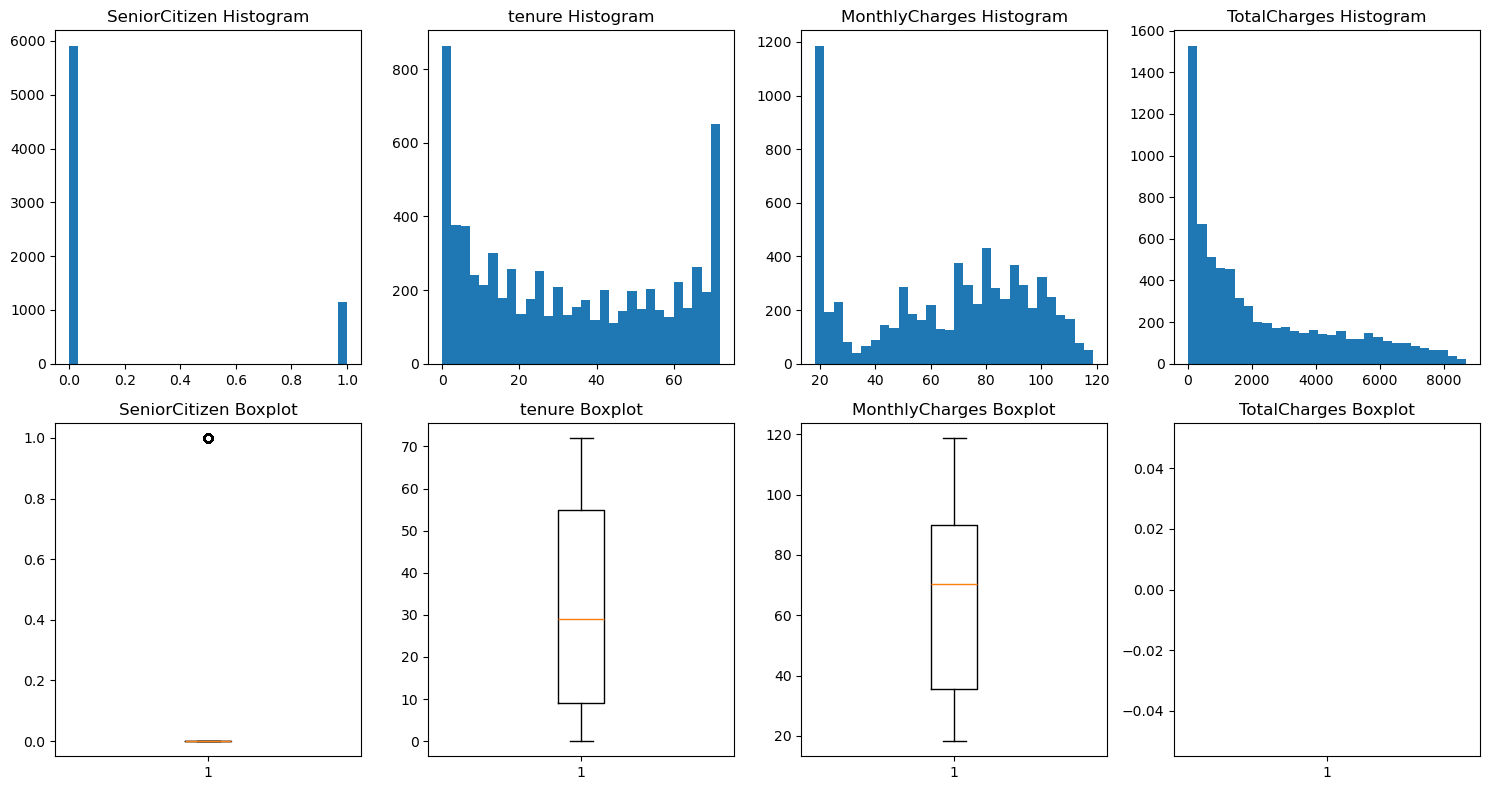

In [15]:
# Numerik değişkenler için histogram, boxplot ve descriptive statistics
# Descriptive statistics
print(data1[numerical_cols].describe())
print("\n")
print("=== HİSTOGRAM VE BOXPLOT ===")
print("\n")
# Histogram ve boxplot
fig, axes = plt.subplots(2, len(numerical_cols), figsize=(15, 8))
for i, col in enumerate(numerical_cols):
    axes[0,i].hist(data1[col], bins=30)
    axes[0,i].set_title(f'{col} Histogram')
    
    axes[1,i].boxplot(data1[col])
    axes[1,i].set_title(f'{col} Boxplot')
plt.tight_layout()
plt.show()

=== BAR CHART VE VALUE COUNT ===


gender:
gender
Male      3555
Female    3488
Name: count, dtype: int64


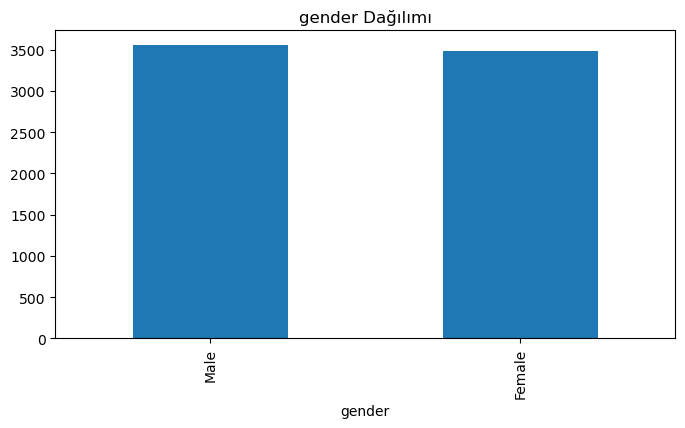

Partner:
Partner
No     3641
Yes    3402
Name: count, dtype: int64


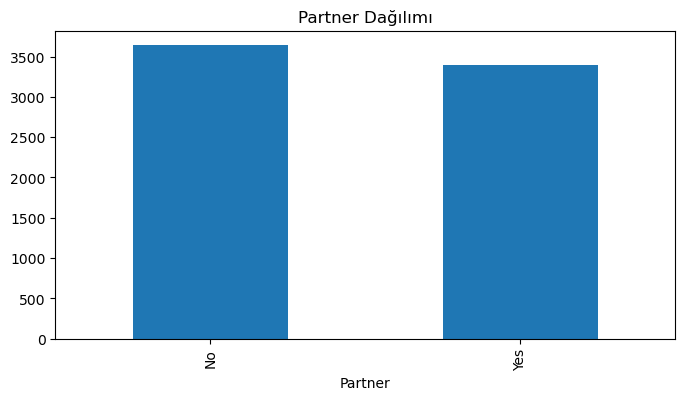

Dependents:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64


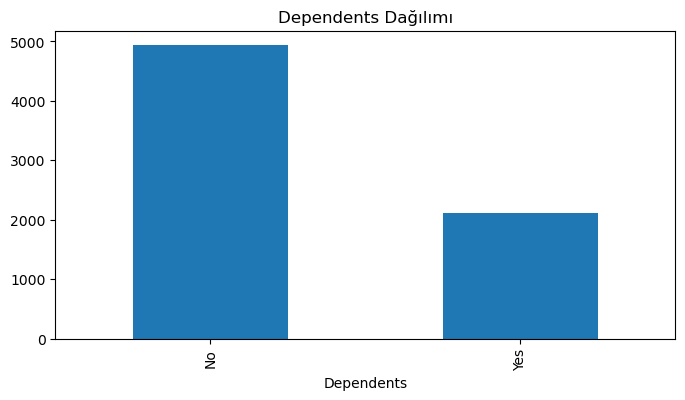

PhoneService:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64


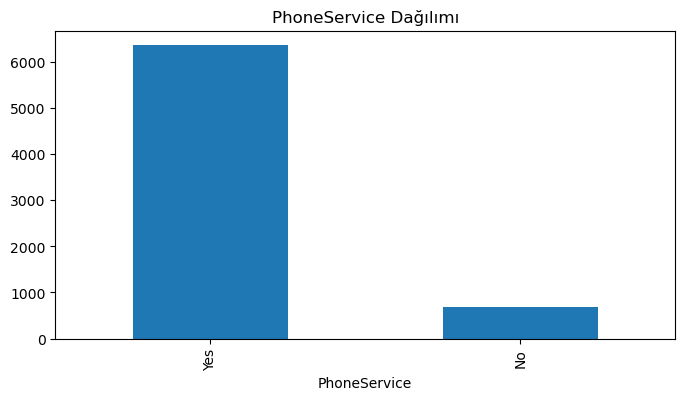

MultipleLines:
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


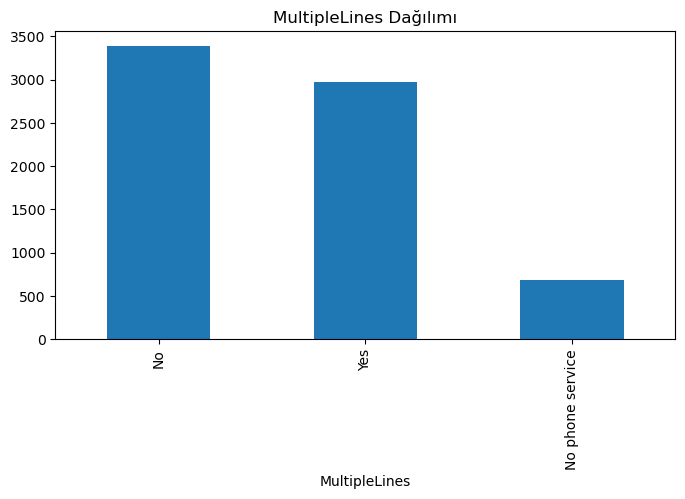

InternetService:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


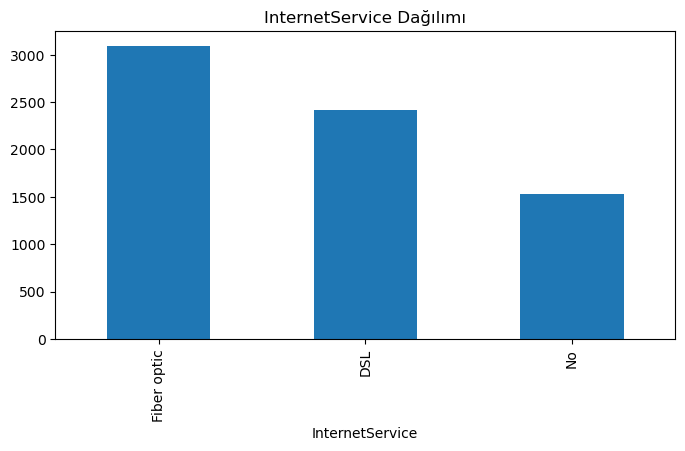

OnlineSecurity:
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64


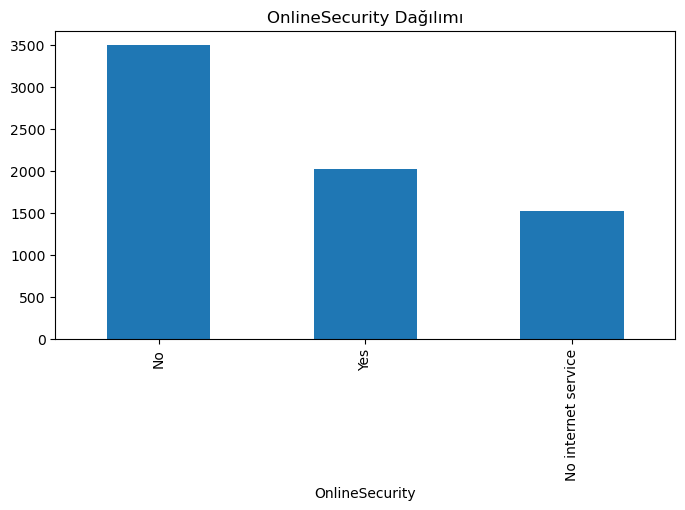

OnlineBackup:
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64


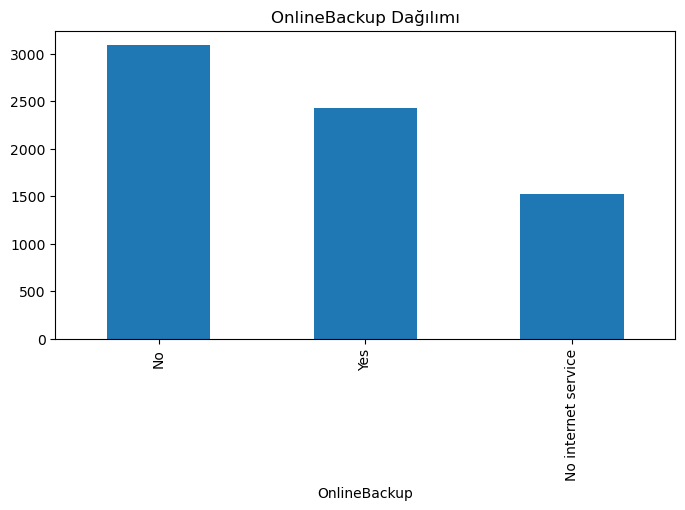

DeviceProtection:
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64


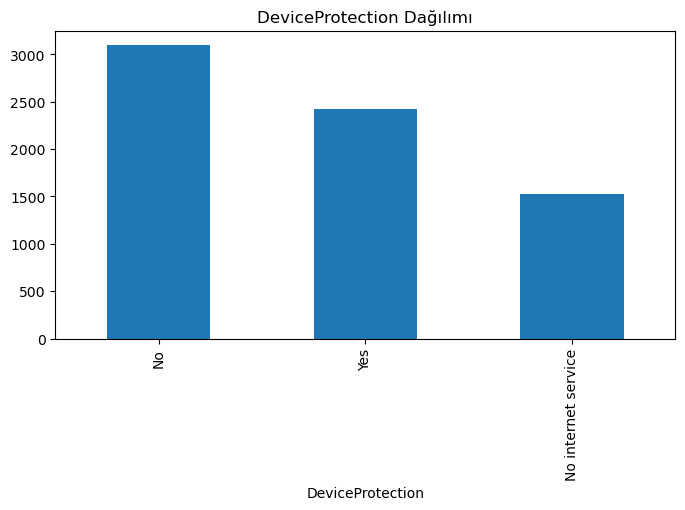

TechSupport:
TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64


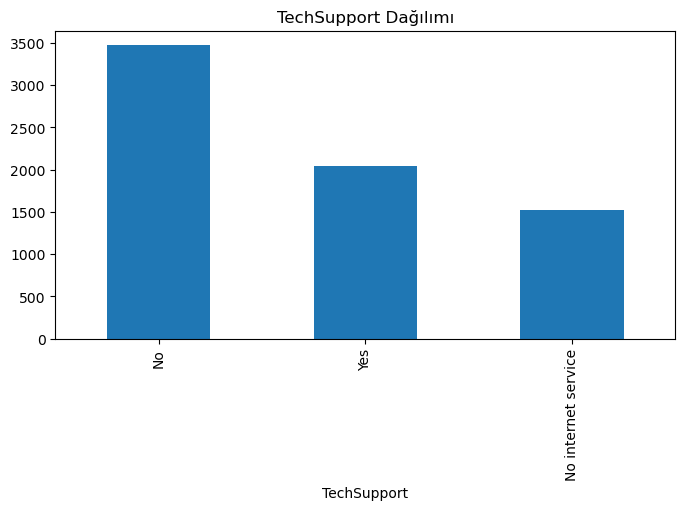

StreamingTV:
StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64


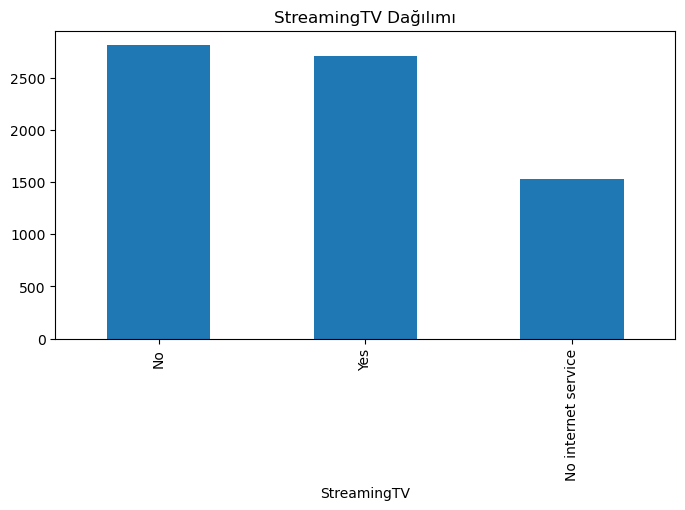

StreamingMovies:
StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64


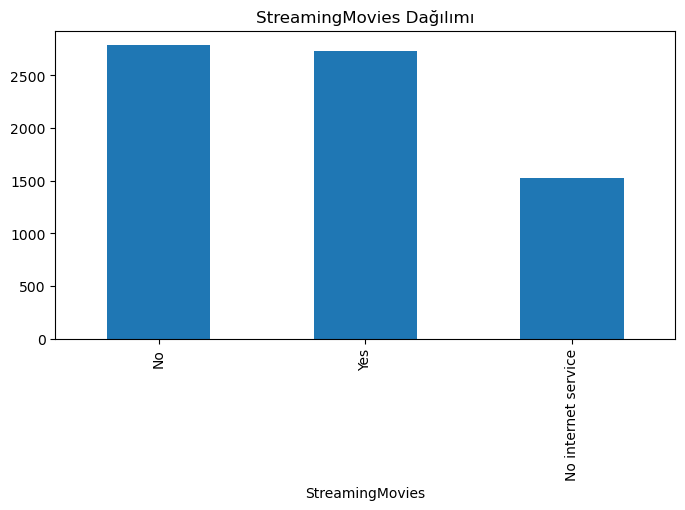

Contract:
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


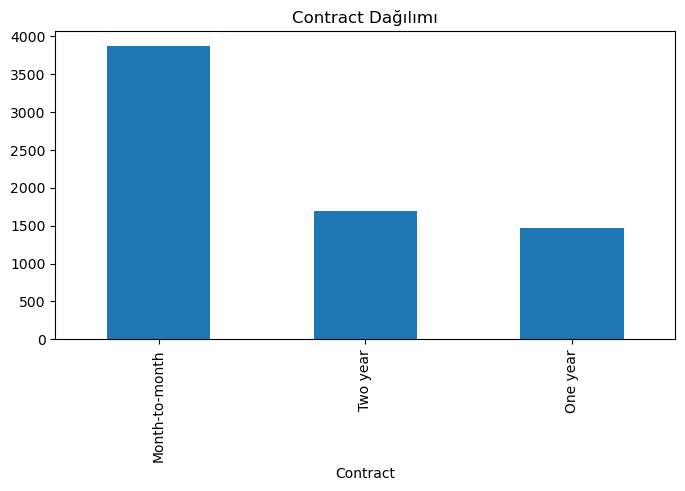

PaperlessBilling:
PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64


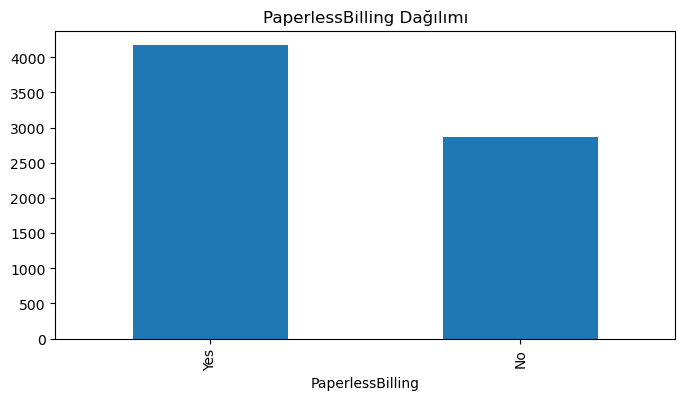

PaymentMethod:
PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


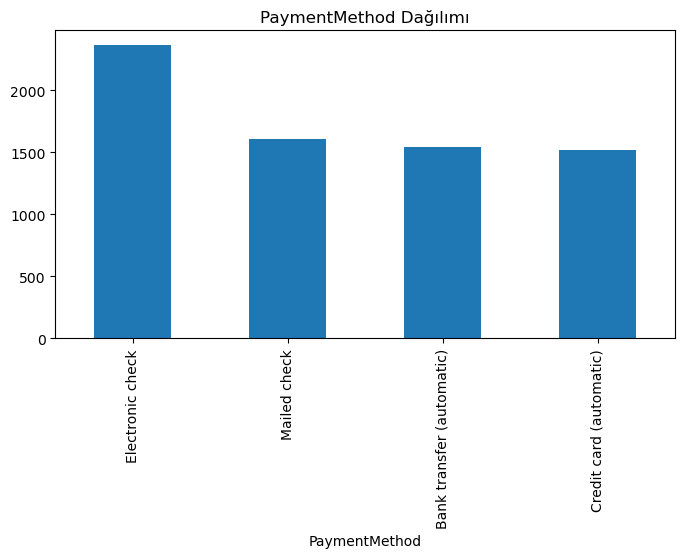

Churn:
Churn
No     5174
Yes    1869
Name: count, dtype: int64


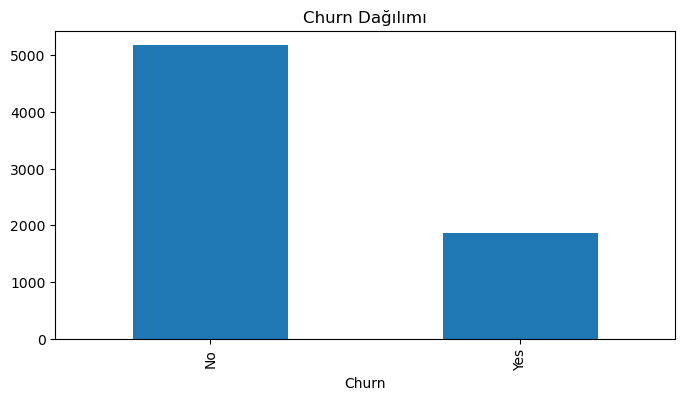

In [16]:
# Kategorik değişkenler için bar chart ve value count
# Value counts ve bar chart
print("=== BAR CHART VE VALUE COUNT ===")
print("\n")

for col in categorical_cols:
    print(f"{col}:")
    print(data1[col].value_counts())
    
    plt.figure(figsize=(8,4))
    data1[col].value_counts().plot(kind='bar')
    plt.title(f'{col} Dağılımı')
    plt.show()

In [17]:
#Outlier tespiti için IQR yöntemi kullanma
for col in numerical_cols:
    Q1 = data1[col].quantile(0.25)
    Q3 = data1[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data1[(data1[col] < Q1-1.5*IQR) | (data1[col] > Q3+1.5*IQR)]
    print(f"{col}: {len(outliers)} outlier (%{len(outliers)/len(data1)*100:.1f})")

SeniorCitizen: 1142 outlier (%16.2)
tenure: 0 outlier (%0.0)
MonthlyCharges: 0 outlier (%0.0)
TotalCharges: 0 outlier (%0.0)


In [18]:
#Her değişkenin unique değer sayısını kontrol etme
for col in data1.columns:
    print(f"{col}: {data1[col].nunique()} unique değer")

customerID: 7043 unique değer
gender: 2 unique değer
SeniorCitizen: 2 unique değer
Partner: 2 unique değer
Dependents: 2 unique değer
tenure: 73 unique değer
PhoneService: 2 unique değer
MultipleLines: 3 unique değer
InternetService: 3 unique değer
OnlineSecurity: 3 unique değer
OnlineBackup: 3 unique değer
DeviceProtection: 3 unique değer
TechSupport: 3 unique değer
StreamingTV: 3 unique değer
StreamingMovies: 3 unique değer
Contract: 3 unique değer
PaperlessBilling: 2 unique değer
PaymentMethod: 4 unique değer
MonthlyCharges: 1585 unique değer
TotalCharges: 6530 unique değer
Churn: 2 unique değer


<a id = "4"></a><br>
## Bivariate Analysis
- Hedef değişken ile her bir feature arasındaki ilişkiyi inceleme 
- Kategorik değişkenler için churn rate hesaplama
- Numerik değişkenler için correlation analysis
- Chi-square test ile kategorik değişkenler arası bağımlılık testi
- Heatmap ile correlation matrix görselleştirme



In [20]:
# Hedef değişken ile her bir feature arasındaki ilişkiyi inceleme
# Hedef değişken
target = 'Churn'

# Kategorik değişkenler için churn rate
print("=== KATEGORİK DEĞİŞKENLER İLE CHURN İLİŞKİSİ ===")
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                  'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                  'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
                  'PaperlessBilling', 'PaymentMethod']

for col in categorical_cols:
   print(f"\n{col}:")
   churn_rate = data1.groupby(col)[target].apply(lambda x: (x == 'Yes').mean())
   print(churn_rate)

# Numerik değişkenler için correlation
print("\n=== NUMERİK DEĞİŞKENLER İLE CHURN KORELASYONU ===")
numerical_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# Churn'u numerik yap (geçici)
data1_temp = data1.copy()
data1_temp['Churn_numeric'] = data1_temp['Churn'].map({'Yes': 1, 'No': 0})

for col in numerical_cols:
   correlation = data1_temp[col].corr(data1_temp['Churn_numeric'])
   print(f"{col}: {correlation:.3f}")

=== KATEGORİK DEĞİŞKENLER İLE CHURN İLİŞKİSİ ===

gender:
gender
Female    0.269209
Male      0.261603
Name: Churn, dtype: float64

Partner:
Partner
No     0.329580
Yes    0.196649
Name: Churn, dtype: float64

Dependents:
Dependents
No     0.312791
Yes    0.154502
Name: Churn, dtype: float64

PhoneService:
PhoneService
No     0.249267
Yes    0.267096
Name: Churn, dtype: float64

MultipleLines:
MultipleLines
No                  0.250442
No phone service    0.249267
Yes                 0.286099
Name: Churn, dtype: float64

InternetService:
InternetService
DSL            0.189591
Fiber optic    0.418928
No             0.074050
Name: Churn, dtype: float64

OnlineSecurity:
OnlineSecurity
No                     0.417667
No internet service    0.074050
Yes                    0.146112
Name: Churn, dtype: float64

OnlineBackup:
OnlineBackup
No                     0.399288
No internet service    0.074050
Yes                    0.215315
Name: Churn, dtype: float64

DeviceProtection:
DeviceProtect

In [21]:
# Kategorik değişkenler için churn rate
print("=== KATEGORİK DEĞİŞKENLER İLE CHURN İLİŞKİSİ ===")
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                   'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
                   'PaperlessBilling', 'PaymentMethod']

for col in categorical_cols:
    print(f"\n{col}:")
    churn_rate = data1.groupby(col)['Churn'].apply(lambda x: (x == 'Yes').mean())
    print(churn_rate)

# Numerik değişkenler için correlation
print("\n=== NUMERİK DEĞİŞKENLER İLE CHURN KORELASYONU ===")
numerical_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# Churn'u numerik yap (geçici)
data1_temp = data1.copy()
data1_temp['Churn_numeric'] = data1_temp['Churn'].map({'Yes': 1, 'No': 0})

for col in numerical_cols:
    correlation = data1_temp[col].corr(data1_temp['Churn_numeric'])
    print(f"{col}: {correlation:.3f}")

=== KATEGORİK DEĞİŞKENLER İLE CHURN İLİŞKİSİ ===

gender:
gender
Female    0.269209
Male      0.261603
Name: Churn, dtype: float64

Partner:
Partner
No     0.329580
Yes    0.196649
Name: Churn, dtype: float64

Dependents:
Dependents
No     0.312791
Yes    0.154502
Name: Churn, dtype: float64

PhoneService:
PhoneService
No     0.249267
Yes    0.267096
Name: Churn, dtype: float64

MultipleLines:
MultipleLines
No                  0.250442
No phone service    0.249267
Yes                 0.286099
Name: Churn, dtype: float64

InternetService:
InternetService
DSL            0.189591
Fiber optic    0.418928
No             0.074050
Name: Churn, dtype: float64

OnlineSecurity:
OnlineSecurity
No                     0.417667
No internet service    0.074050
Yes                    0.146112
Name: Churn, dtype: float64

OnlineBackup:
OnlineBackup
No                     0.399288
No internet service    0.074050
Yes                    0.215315
Name: Churn, dtype: float64

DeviceProtection:
DeviceProtect

=== CHURN RATE SIRALAMASI ===
En yüksek churn rate'ler:
gender - Female: 0.269
Partner - No: 0.330
Dependents - No: 0.313
PhoneService - Yes: 0.267
MultipleLines - Yes: 0.286
InternetService - Fiber optic: 0.419
OnlineSecurity - No: 0.418
OnlineBackup - No: 0.399
DeviceProtection - No: 0.391
TechSupport - No: 0.416
StreamingTV - No: 0.335
StreamingMovies - No: 0.337
Contract - Month-to-month: 0.427
PaperlessBilling - Yes: 0.336
PaymentMethod - Electronic check: 0.453


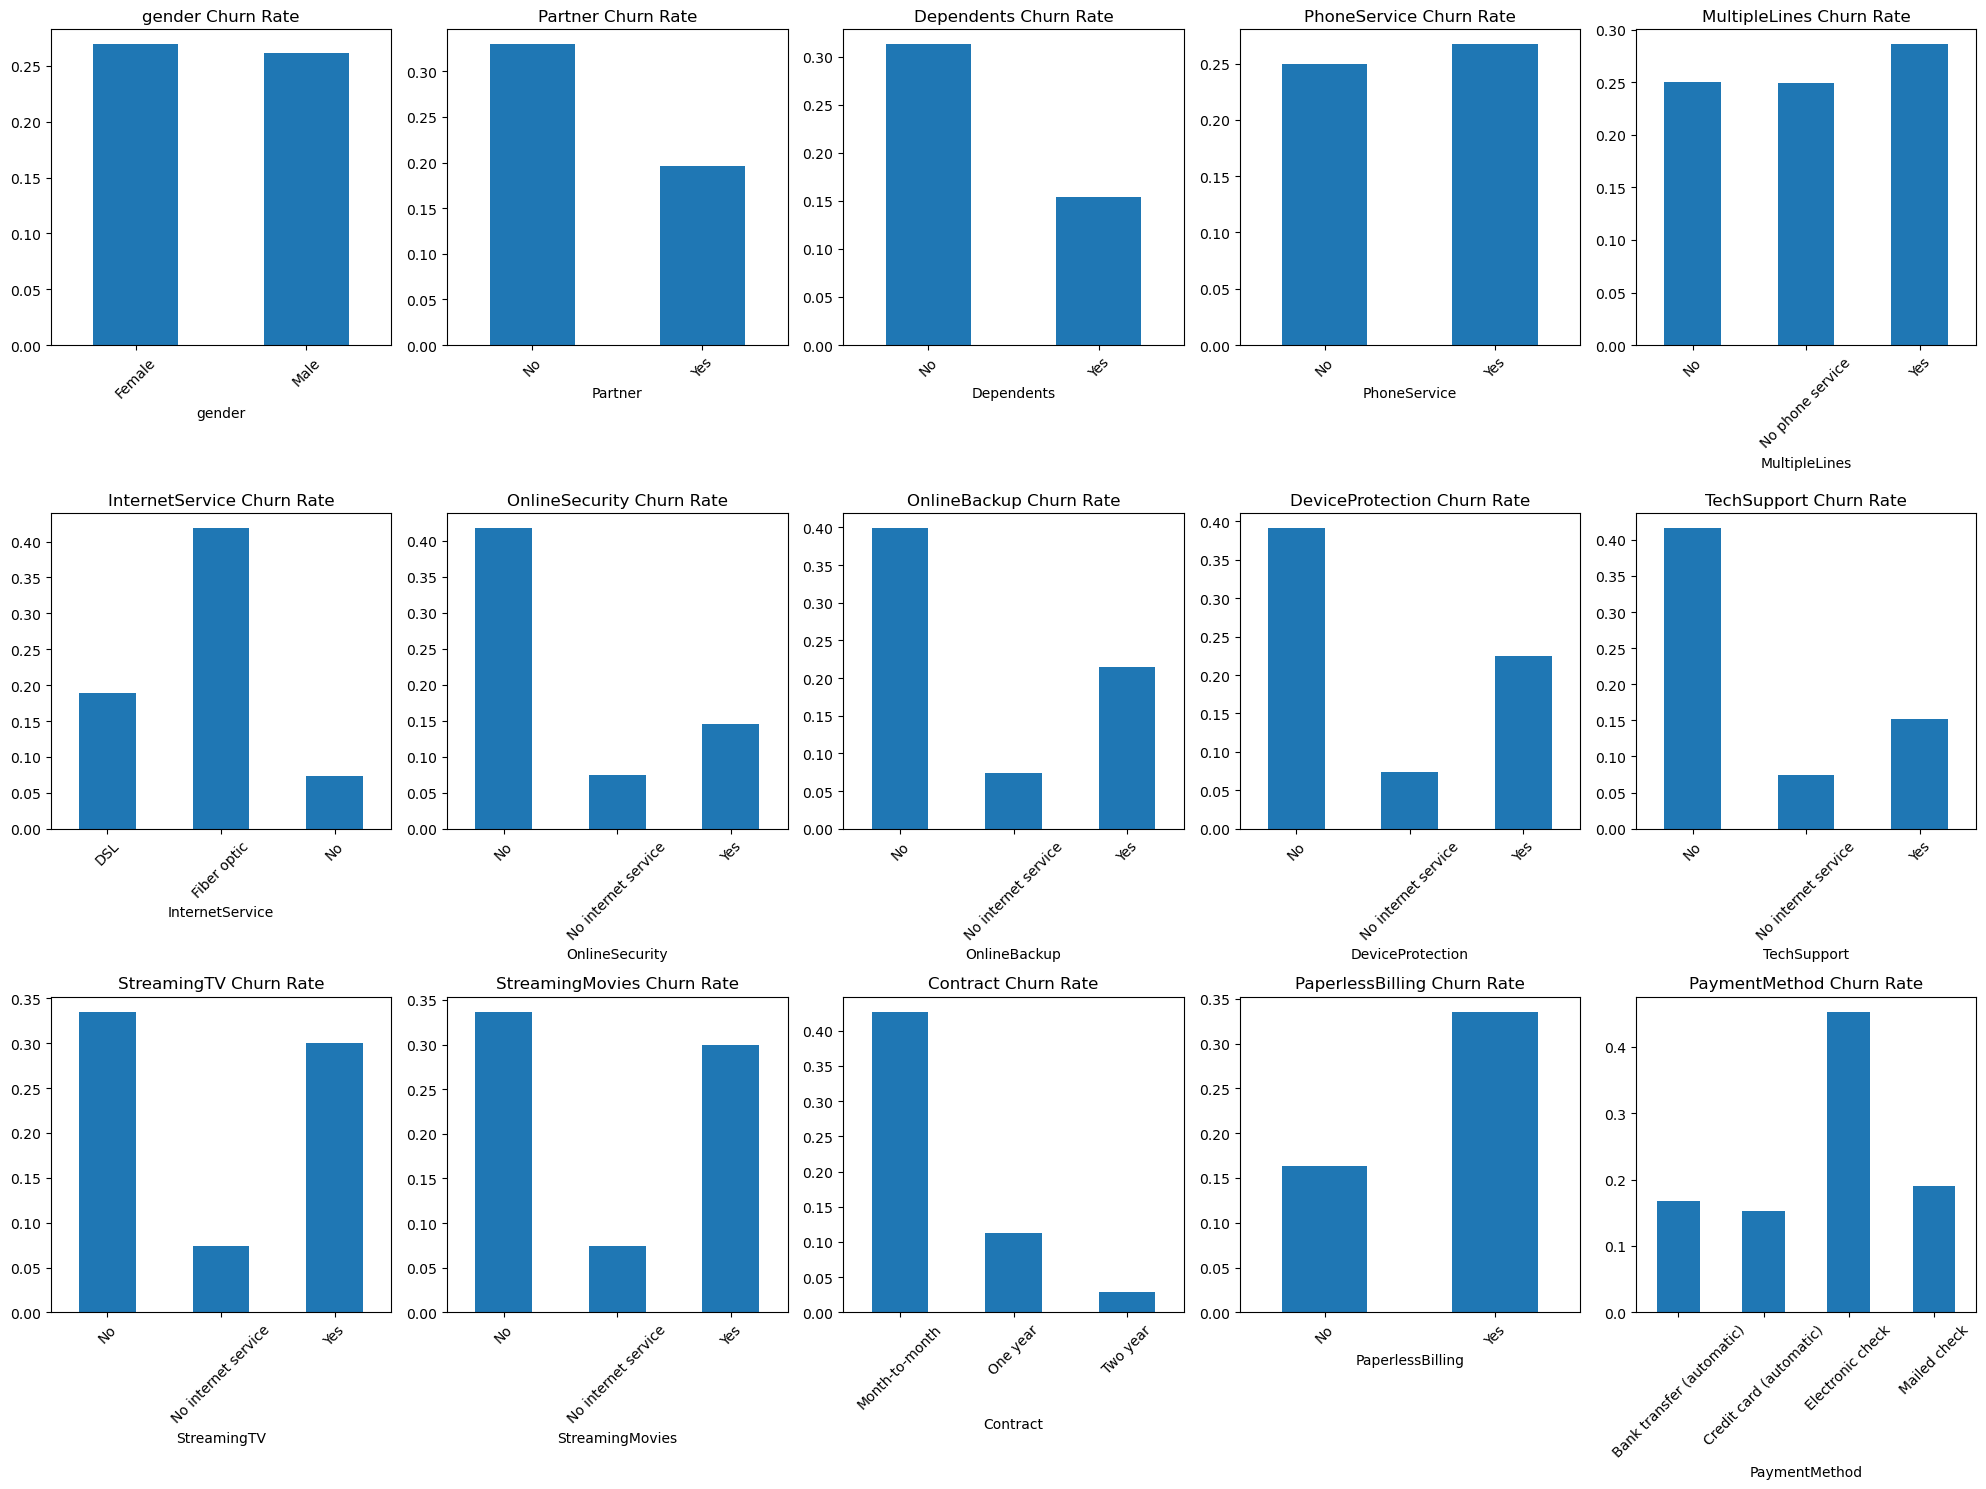

In [22]:
print("=== CHURN RATE SIRALAMASI ===")

# Tüm kategorik değişkenler için churn rate'leri topla
churn_rates = {}
for col in categorical_cols:
    rates = data1.groupby(col)['Churn'].apply(lambda x: (x == 'Yes').mean())
    churn_rates[col] = rates

# En yüksek churn rate'leri bul
print("En yüksek churn rate'ler:")
for col, rates in churn_rates.items():
    max_rate = rates.max()
    max_category = rates.idxmax()
    print(f"{col} - {max_category}: {max_rate:.3f}")

# Görselleştirme
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 5, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    rates = data1.groupby(col)['Churn'].apply(lambda x: (x == 'Yes').mean())
    rates.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'{col} Churn Rate')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

                SeniorCitizen    tenure  MonthlyCharges  TotalCharges  \
SeniorCitizen        1.000000  0.016567        0.220173      0.102411   
tenure               0.016567  1.000000        0.247900      0.825880   
MonthlyCharges       0.220173  0.247900        1.000000      0.651065   
TotalCharges         0.102411  0.825880        0.651065      1.000000   
Churn_numeric        0.150889 -0.352229        0.193356     -0.199484   

                Churn_numeric  
SeniorCitizen        0.150889  
tenure              -0.352229  
MonthlyCharges       0.193356  
TotalCharges        -0.199484  
Churn_numeric        1.000000  


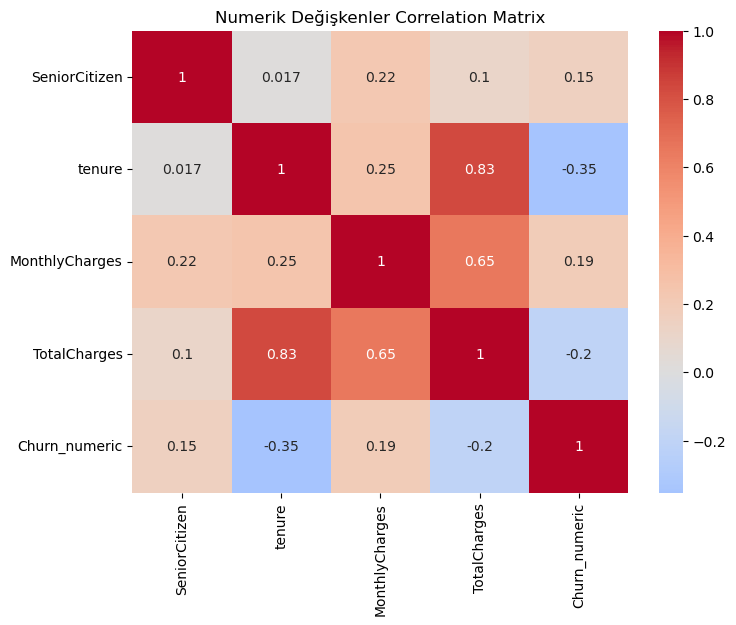


=== CHURN İLE EN YÜKSEK KORELASYONLAR ===


tenure           -0.352229
TotalCharges     -0.199484
MonthlyCharges    0.193356
SeniorCitizen     0.150889
Name: Churn_numeric, dtype: float64


In [23]:
# Numerik değişkenler arası correlation matrix

numerical_df = data1_temp[numerical_cols + ['Churn_numeric']]
correlation_matrix = numerical_df.corr()
print(correlation_matrix)

# Görselleştirme
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Numerik Değişkenler Correlation Matrix')
plt.show()

# Churn ile en yüksek korelasyonlar
print("\n=== CHURN İLE EN YÜKSEK KORELASYONLAR ===")
print("\n")
churn_corr = correlation_matrix['Churn_numeric'].drop('Churn_numeric').sort_values(key=abs, ascending=False)
print(churn_corr)

In [24]:
from scipy.stats import chi2_contingency

print("=== CHI-SQUARE TEST SONUÇLARI ===")
print("Kategorik değişkenler ile Churn arasındaki bağımlılık:")

for col in categorical_cols:
    # Contingency table oluştur
    contingency_table = pd.crosstab(data1[col], data1['Churn'])
    
    # Chi-square test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Sonuçları yorumla
    significance = "Anlamlı" if p_value < 0.05 else "Anlamsız"
    
    print(f"\n{col}:")
    print(f"  Chi2: {chi2:.3f}")
    print(f"  p-value: {p_value:.3f}")
    print(f"  Sonuç: {significance}")

=== CHI-SQUARE TEST SONUÇLARI ===
Kategorik değişkenler ile Churn arasındaki bağımlılık:

gender:
  Chi2: 0.484
  p-value: 0.487
  Sonuç: Anlamsız

Partner:
  Chi2: 158.733
  p-value: 0.000
  Sonuç: Anlamlı

Dependents:
  Chi2: 189.129
  p-value: 0.000
  Sonuç: Anlamlı

PhoneService:
  Chi2: 0.915
  p-value: 0.339
  Sonuç: Anlamsız

MultipleLines:
  Chi2: 11.330
  p-value: 0.003
  Sonuç: Anlamlı

InternetService:
  Chi2: 732.310
  p-value: 0.000
  Sonuç: Anlamlı

OnlineSecurity:
  Chi2: 849.999
  p-value: 0.000
  Sonuç: Anlamlı

OnlineBackup:
  Chi2: 601.813
  p-value: 0.000
  Sonuç: Anlamlı

DeviceProtection:
  Chi2: 558.419
  p-value: 0.000
  Sonuç: Anlamlı

TechSupport:
  Chi2: 828.197
  p-value: 0.000
  Sonuç: Anlamlı

StreamingTV:
  Chi2: 374.204
  p-value: 0.000
  Sonuç: Anlamlı

StreamingMovies:
  Chi2: 375.661
  p-value: 0.000
  Sonuç: Anlamlı

Contract:
  Chi2: 1184.597
  p-value: 0.000
  Sonuç: Anlamlı

PaperlessBilling:
  Chi2: 258.278
  p-value: 0.000
  Sonuç: Anlamlı

Paym

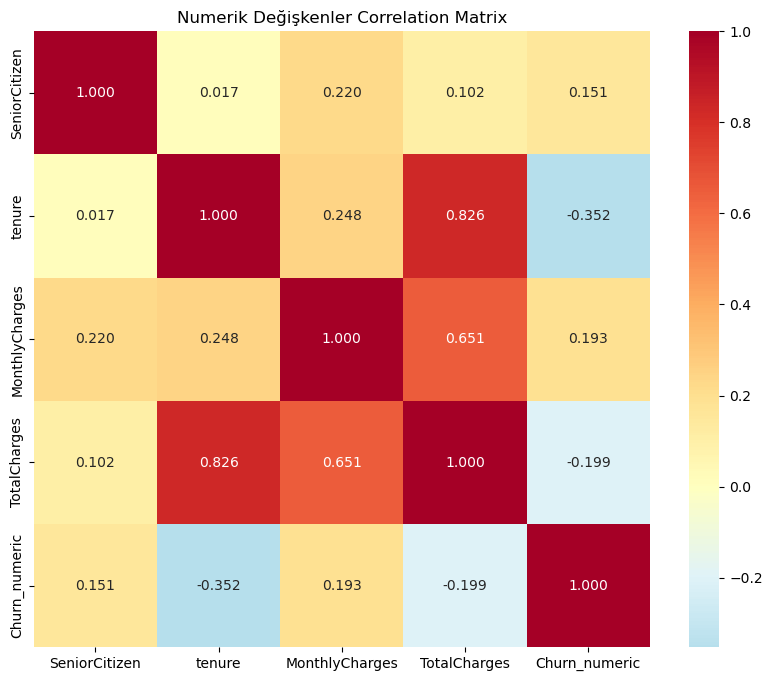

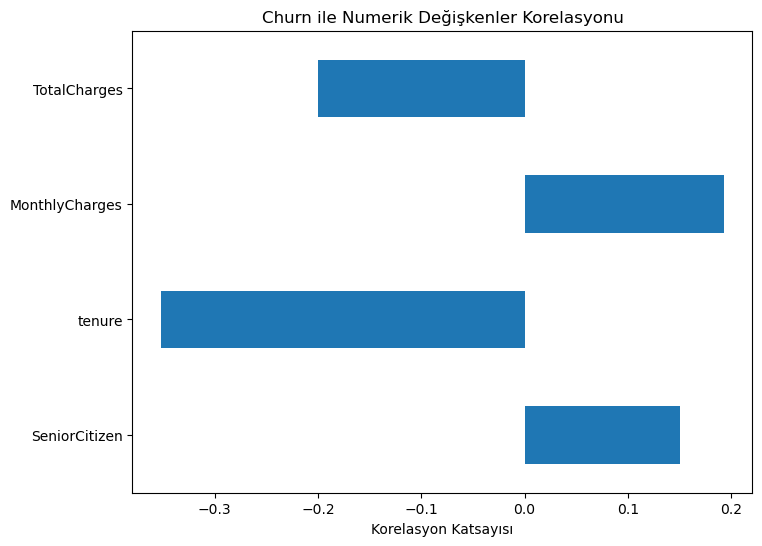

In [25]:
# Tüm numerik değişkenler için correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data1_temp[numerical_cols + ['Churn_numeric']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0, 
            square=True, fmt='.3f')
plt.title('Numerik Değişkenler Correlation Matrix')
plt.show()

# Sadece Churn ile korelasyonları göster
plt.figure(figsize=(8, 6))
churn_corr = correlation_matrix['Churn_numeric'].drop('Churn_numeric')
churn_corr.plot(kind='barh')
plt.title('Churn ile Numerik Değişkenler Korelasyonu')
plt.xlabel('Korelasyon Katsayısı')
plt.show()

<a id = "5"></a><br>
## Multivariate Analysis
- Pair plot ile multiple variables arası ilişki
- Feature importance preliminary analysis 
- Customer lifetime value vs churn relationship


=== NUMERİK DEĞİŞKENLER PAIR PLOT ===
 



<Figure size 1200x1000 with 0 Axes>

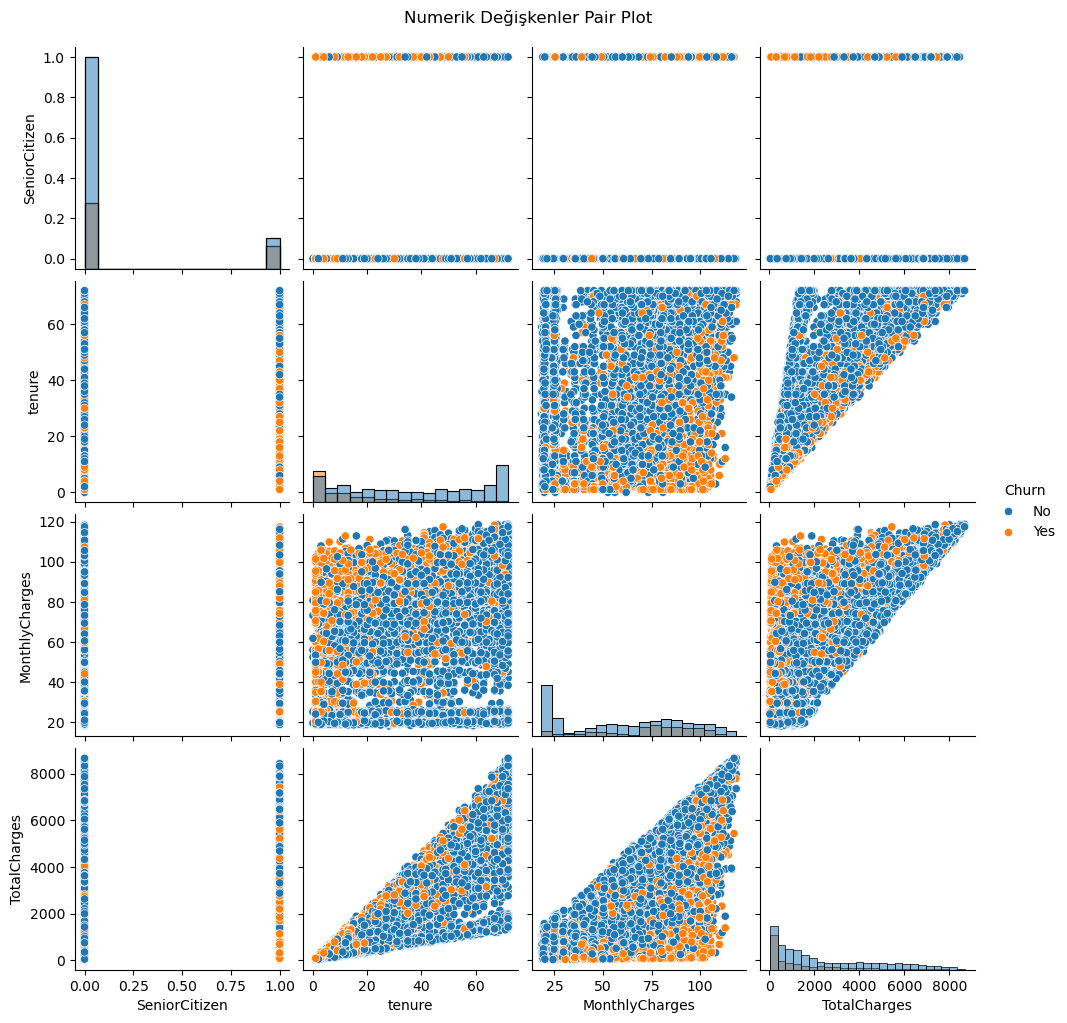

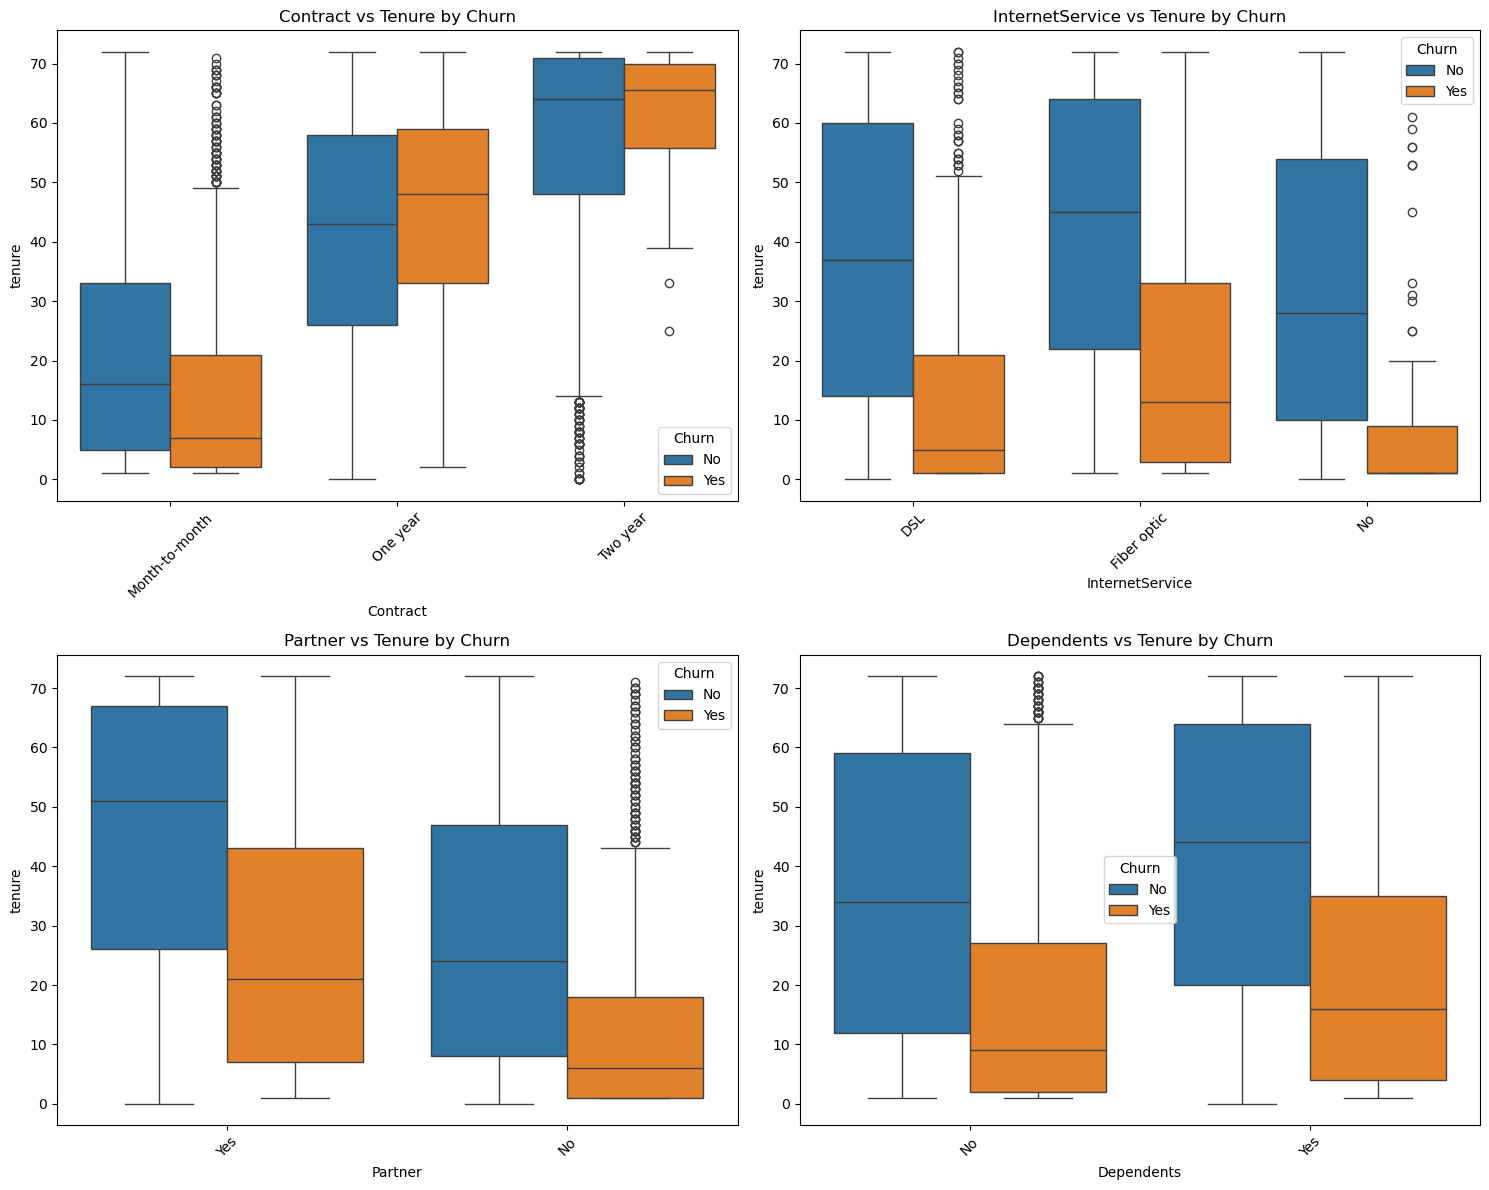

In [27]:
# Pair plot ile multiple variables arası ilişki
print("=== NUMERİK DEĞİŞKENLER PAIR PLOT ===")
print(" \n")
plt.figure(figsize=(12, 10))
numerical_for_plot = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
sns.pairplot(data1_temp[numerical_for_plot + ['Churn']], hue='Churn', diag_kind='hist')
plt.suptitle('Numerik Değişkenler Pair Plot', y=1.02)
plt.show()

# Seçili kategorik değişkenler ile numerik değişkenler
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

important_cat_vars = ['Contract', 'InternetService', 'Partner', 'Dependents']
for i, cat_var in enumerate(important_cat_vars):
    sns.boxplot(data=data1_temp, x=cat_var, y='tenure', hue='Churn', ax=axes[i])
    axes[i].set_title(f'{cat_var} vs Tenure by Churn')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

=== FEATURE IMPORTANCE SIRALAMASI ===
             feature  importance
18      TotalCharges    0.190272
17    MonthlyCharges    0.181071
4             tenure    0.157123
14          Contract    0.079103
16     PaymentMethod    0.051166
8     OnlineSecurity    0.045327
11       TechSupport    0.043704
0             gender    0.027833
7    InternetService    0.027176
9       OnlineBackup    0.026789
15  PaperlessBilling    0.025175
6      MultipleLines    0.022337
2            Partner    0.022033
10  DeviceProtection    0.021154
1      SeniorCitizen    0.020838
3         Dependents    0.019520
12       StreamingTV    0.017421
13   StreamingMovies    0.017199
5       PhoneService    0.004760


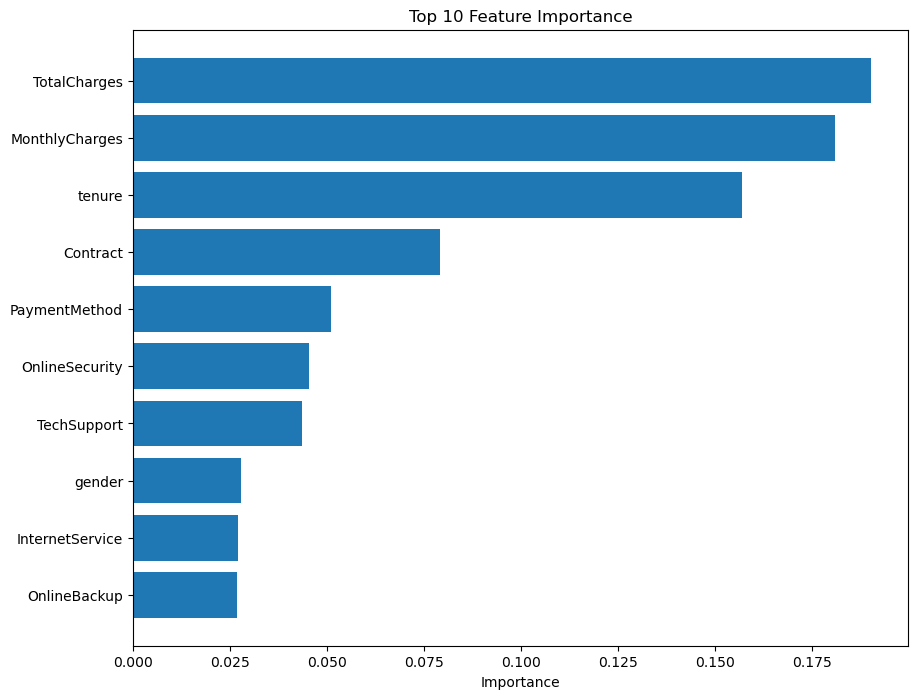

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Kategorik değişkenleri encode et (geçici)
data_temp = data1.copy()
le_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
           'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
           'PaperlessBilling', 'PaymentMethod', 'Churn']

for col in le_cols:
    le = LabelEncoder()
    data_temp[col] = le.fit_transform(data_temp[col])

# Feature importance hesaplama
X = data_temp.drop(['customerID', 'Churn'], axis=1)
y = data_temp['Churn']

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Feature importance tablosu
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("=== FEATURE IMPORTANCE SIRALAMASI ===")
print(feature_importance)

# Görselleştirme
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(10)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance')
plt.gca().invert_yaxis()
plt.show()

=== CUSTOMER LIFETIME VALUE vs CHURN ===
CLV Group bazında churn rate:
CLV_Group
Very Low     0.329318
Low          0.242881
Medium       0.169374
High         0.149573
Very High    0.112272
Name: Churn, dtype: float64

CLV Descriptive Statistics:
count    7043.000000
mean     2279.581350
std      2264.729447
min         0.000000
25%       394.000000
50%      1393.600000
75%      3786.100000
max      8550.000000
Name: CLV, dtype: float64

Churn = Yes müşteriler CLV ortalaması: 1531.61
Churn = No müşteriler CLV ortalaması: 2549.77


/var/folders/f1/wsljqfs12bnfxs4yzjv258w40000gn/T/ipykernel_58458/3481490565.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clv_churn = data1.groupby('CLV_Group')['Churn'].apply(lambda x: (x == 'Yes').mean())


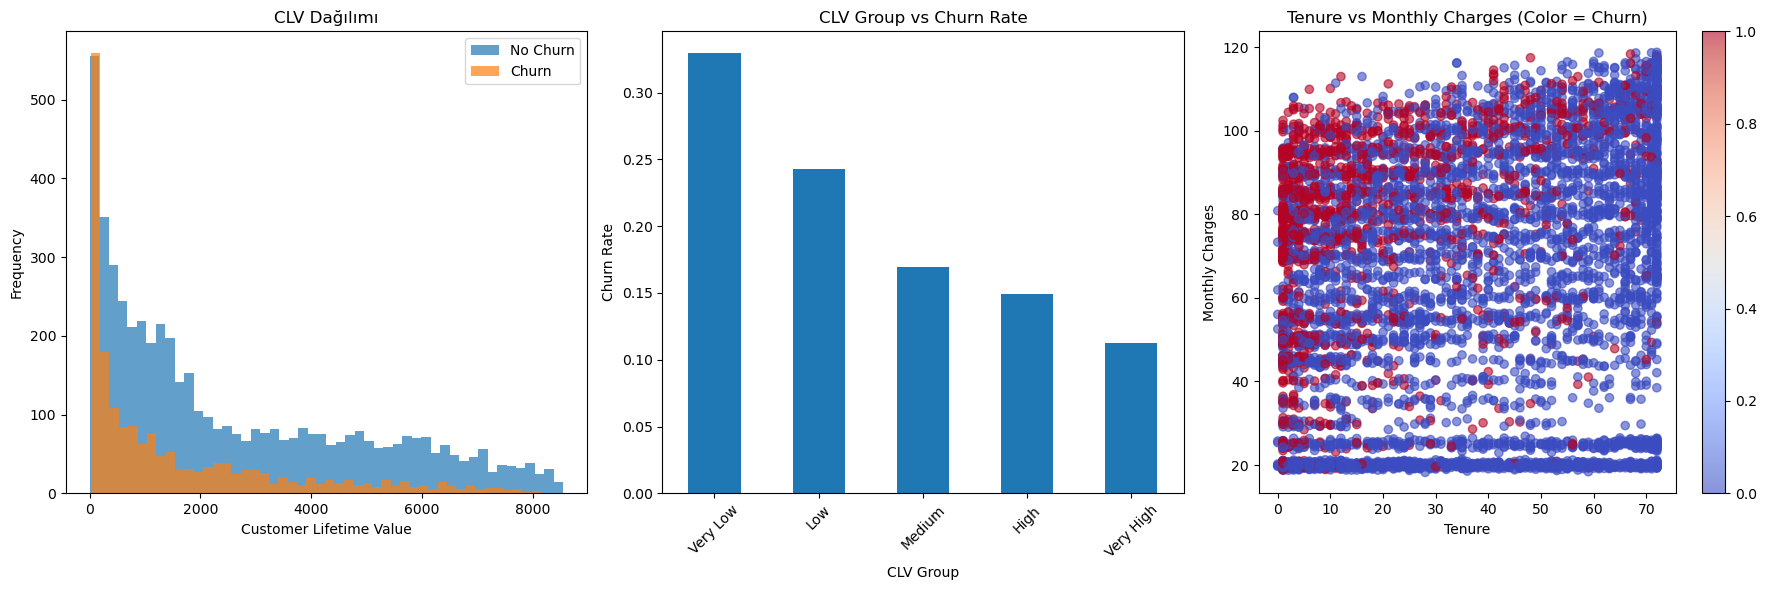

In [29]:
# Customer lifetime value vs churn relationship
# Customer Lifetime Value hesaplama
data1['CLV'] = data1['tenure'] * data1['MonthlyCharges']

# CLV kategorileri oluştur
data1['CLV_Group'] = pd.cut(data1['CLV'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# CLV vs Churn analizi
print("=== CUSTOMER LIFETIME VALUE vs CHURN ===")
clv_churn = data1.groupby('CLV_Group')['Churn'].apply(lambda x: (x == 'Yes').mean())
print("CLV Group bazında churn rate:")
print(clv_churn)

# CLV istatistikleri
print(f"\nCLV Descriptive Statistics:")
print(data1['CLV'].describe())

print(f"\nChurn = Yes müşteriler CLV ortalaması: {data1[data1['Churn']=='Yes']['CLV'].mean():.2f}")
print(f"Churn = No müşteriler CLV ortalaması: {data1[data1['Churn']=='No']['CLV'].mean():.2f}")

# Görselleştirme
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# CLV dağılımı
axes[0].hist(data1[data1['Churn']=='No']['CLV'], alpha=0.7, label='No Churn', bins=50)
axes[0].hist(data1[data1['Churn']=='Yes']['CLV'], alpha=0.7, label='Churn', bins=50)
axes[0].set_xlabel('Customer Lifetime Value')
axes[0].set_ylabel('Frequency')
axes[0].set_title('CLV Dağılımı')
axes[0].legend()

# CLV vs Churn rate
clv_churn.plot(kind='bar', ax=axes[1])
axes[1].set_title('CLV Group vs Churn Rate')
axes[1].set_xlabel('CLV Group')
axes[1].set_ylabel('Churn Rate')
axes[1].tick_params(axis='x', rotation=45)

# CLV vs Tenure vs MonthlyCharges
scatter = axes[2].scatter(data1['tenure'], data1['MonthlyCharges'], 
                         c=data1['Churn'].map({'No': 0, 'Yes': 1}), 
                         cmap='coolwarm', alpha=0.6)
axes[2].set_xlabel('Tenure')
axes[2].set_ylabel('Monthly Charges')
axes[2].set_title('Tenure vs Monthly Charges (Color = Churn)')
plt.colorbar(scatter, ax=axes[2])

plt.tight_layout()
plt.show()

<a id = "6"></a><br>
## Feature Engineering ve Preprocessing



<a id = "7"></a><br>
## Data Cleaning

- Missing values için appropriate imputation strategy (mode/median/mean) 
- Inconsistent data formatlarını düzeltme (örnekte 'TotalCharges' string olabilir) 
- Outlier treatment (removal veya capping)


In [32]:
 # Eksik değerleri kontrol et
print("=== EKSİK DEĞER ANALİZİ ===")
missing_values = data1.isnull().sum()
print(missing_values[missing_values > 0])

# Yüzdelik hesaplama
missing_percentage = (data1.isnull().sum() / len(data1)) * 100
print(f"\nEksik değer yüzdeleri:")
print(missing_percentage[missing_percentage > 0]) 

=== EKSİK DEĞER ANALİZİ ===
TotalCharges    11
dtype: int64

Eksik değer yüzdeleri:
TotalCharges    0.156183
dtype: float64


In [33]:
# Eksik değerleri incele
print("=== MISSING VALUES DETAY ANALİZİ ===")
print("TotalCharges eksik olan satırlar:")
missing_rows = data1[data1['TotalCharges'].isnull()]
print(missing_rows[['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']])

# Imputation strategy: tenure=0 ise 0, değilse MonthlyCharges * tenure
print("\n=== IMPUTATION STRATEGY ===")

def impute_total_charges(row):
    if pd.isna(row['TotalCharges']):
        if row['tenure'] == 0:
            return 0
        else:
            return row['MonthlyCharges'] * row['tenure']
    return row['TotalCharges']

# Imputation uygula
data1['TotalCharges'] = data1.apply(impute_total_charges, axis=1)

print(f"Imputation sonrası eksik değer: {data1['TotalCharges'].isnull().sum()}")

=== MISSING VALUES DETAY ANALİZİ ===
TotalCharges eksik olan satırlar:
      customerID  tenure  MonthlyCharges  TotalCharges
488   4472-LVYGI       0           52.55           NaN
753   3115-CZMZD       0           20.25           NaN
936   5709-LVOEQ       0           80.85           NaN
1082  4367-NUYAO       0           25.75           NaN
1340  1371-DWPAZ       0           56.05           NaN
3331  7644-OMVMY       0           19.85           NaN
3826  3213-VVOLG       0           25.35           NaN
4380  2520-SGTTA       0           20.00           NaN
5218  2923-ARZLG       0           19.70           NaN
6670  4075-WKNIU       0           73.35           NaN
6754  2775-SEFEE       0           61.90           NaN

=== IMPUTATION STRATEGY ===
Imputation sonrası eksik değer: 0


In [34]:
# Outlier detection
print("=== OUTLIER TESPİTİ (IQR YÖNTEMİ) ===")
numerical_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

outlier_info = {}
for col in numerical_cols:
    Q1 = data1[col].quantile(0.25)
    Q3 = data1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data1[(data1[col] < lower_bound) | (data1[col] > upper_bound)]
    outlier_info[col] = {
        'count': len(outliers),
        'percentage': len(outliers)/len(data1)*100,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }
    
    print(f"{col}:")
    print(f"  Outlier count: {len(outliers)} ({len(outliers)/len(data1)*100:.2f}%)")
    print(f"  Bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")

=== OUTLIER TESPİTİ (IQR YÖNTEMİ) ===
SeniorCitizen:
  Outlier count: 1142 (16.21%)
  Bounds: [0.00, 0.00]
tenure:
  Outlier count: 0 (0.00%)
  Bounds: [-60.00, 124.00]
MonthlyCharges:
  Outlier count: 0 (0.00%)
  Bounds: [-46.02, 171.38]
TotalCharges:
  Outlier count: 0 (0.00%)
  Bounds: [-4683.52, 8868.67]


In [35]:
# Outlier treatment kararı
print("=== OUTLIER TREATMENT KARARI ===")

# SeniorCitizen analizi
print("SeniorCitizen outlier analizi:")
print(f"Unique değerler: {data1['SeniorCitizen'].unique()}")
print(f"Value counts:")
print(data1['SeniorCitizen'].value_counts())

# SeniorCitizen binary değişken olduğu için outlier değil
print("\nSeniorCitizen binary değişken (0,1) - outlier treatment gereksiz")

# Diğer değişkenler outlier yok
print("Diğer numerik değişkenlerde outlier bulunmadı")

# Final kontrol
print("\n=== DATA CLEANING TAMAMLANDI ===")
print(f"Eksik değer sayısı: {data1.isnull().sum().sum()}")
print(f"Veri seti boyutu: {data1.shape}")
print(f"TotalCharges veri tipi: {data1['TotalCharges'].dtype}")


=== OUTLIER TREATMENT KARARI ===
SeniorCitizen outlier analizi:
Unique değerler: [0 1]
Value counts:
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

SeniorCitizen binary değişken (0,1) - outlier treatment gereksiz
Diğer numerik değişkenlerde outlier bulunmadı

=== DATA CLEANING TAMAMLANDI ===
Eksik değer sayısı: 0
Veri seti boyutu: (7043, 23)
TotalCharges veri tipi: float64


<a id = "8"></a><br>
## Feature Engineering

- Yeni features oluşturma (örn: tenure_group, charges_per_service) 
- Binning/discretization uygulama (tenure kategorilere ayırma) 
- One-hot encoding kategorik değişkenler için
- Label encoding binary kategorik değişkenler için
- Feature scaling (StandardScaler veya MinMaxScaler)

In [37]:
# Yeni features oluşturma
print("\n=== YENİ FEATURES OLUŞTURMA ===")
print("\n")
data_fe = data1.copy()

# 1. Tenure group
data_fe['tenure_group'] = pd.cut(data_fe['tenure'], 
                                bins=[0, 12, 24, 36, 48, 100], 
                                labels=['0-12', '12-24', '24-36', '36-48', '48+'])

# 2. Charges per service
service_cols = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
               'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
data_fe['total_services'] = 0
for col in service_cols:
    data_fe['total_services'] += (data_fe[col] == 'Yes').astype(int)

data_fe['charges_per_service'] = data_fe['MonthlyCharges'] / (data_fe['total_services'] + 1)

# 3. Customer lifetime value
data_fe['customer_lifetime_value'] = data_fe['tenure'] * data_fe['MonthlyCharges']

# 4. Average monthly charges
data_fe['avg_monthly_charges'] = data_fe['TotalCharges'] / (data_fe['tenure'] + 1)

print(f"Yeni features eklendi. Shape: {data_fe.shape}")
print(f"Yeni sütunlar: ['tenure_group', 'total_services', 'charges_per_service', 'customer_lifetime_value', 'avg_monthly_charges']")


=== YENİ FEATURES OLUŞTURMA ===


Yeni features eklendi. Shape: (7043, 28)
Yeni sütunlar: ['tenure_group', 'total_services', 'charges_per_service', 'customer_lifetime_value', 'avg_monthly_charges']


In [38]:
# Binning/discretization uygulama (tenure kategorilere ayırma)
print("\n=== BINNING/DISCRETIZATION ===")
print("\n")
# MonthlyCharges kategorilerine ayır
data_fe['monthly_charges_group'] = pd.cut(data_fe['MonthlyCharges'], 
                                         bins=[0, 35, 65, 95, 120], 
                                         labels=['Low', 'Medium', 'High', 'Very High'])

# TotalCharges kategorilerine ayır
data_fe['total_charges_group'] = pd.cut(data_fe['TotalCharges'], 
                                       bins=[0, 1000, 3000, 5000, 10000], 
                                       labels=['Low', 'Medium', 'High', 'Very High'])

# Total services kategorilerine ayır
data_fe['services_group'] = pd.cut(data_fe['total_services'], 
                                  bins=[-1, 2, 5, 8, 12], 
                                  labels=['Low', 'Medium', 'High', 'Very High'])

print(f"Binning sonrası shape: {data_fe.shape}")
print(f"Yeni kategorik sütunlar: ['monthly_charges_group', 'total_charges_group', 'services_group']")

# Kontrol
print("\nKategorik grupların dağılımı:")
print(f"tenure_group: {data_fe['tenure_group'].value_counts().to_dict()}")
print(f"monthly_charges_group: {data_fe['monthly_charges_group'].value_counts().to_dict()}")


=== BINNING/DISCRETIZATION ===


Binning sonrası shape: (7043, 31)
Yeni kategorik sütunlar: ['monthly_charges_group', 'total_charges_group', 'services_group']

Kategorik grupların dağılımı:
tenure_group: {'48+': 2239, '0-12': 2175, '12-24': 1024, '24-36': 832, '36-48': 762}
monthly_charges_group: {'High': 2604, 'Low': 1735, 'Medium': 1409, 'Very High': 1295}


In [39]:
# Binary ve multi-class kategorik değişkenleri ayır
print("\n=== KATEGORİK DEĞİŞKEN AYIRMA ===")
print("\n")

# Binary kategorik değişkenler (Label Encoding)
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

# Multi-class kategorik değişkenler (One-hot Encoding)
multi_class_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                   'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                   'Contract', 'PaymentMethod', 'tenure_group', 'monthly_charges_group', 
                   'total_charges_group', 'services_group']

# Numerik değişkenler
numerical_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 
                 'total_services', 'charges_per_service', 'customer_lifetime_value', 
                 'avg_monthly_charges']

print(f"Binary kategorik ({len(binary_cols)}): {binary_cols}")
print(f"Multi-class kategorik ({len(multi_class_cols)}): {multi_class_cols}")
print(f"Numerik ({len(numerical_cols)}): {numerical_cols}")


=== KATEGORİK DEĞİŞKEN AYIRMA ===


Binary kategorik (6): ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
Multi-class kategorik (14): ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'tenure_group', 'monthly_charges_group', 'total_charges_group', 'services_group']
Numerik (8): ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'total_services', 'charges_per_service', 'customer_lifetime_value', 'avg_monthly_charges']


In [40]:
from sklearn.preprocessing import LabelEncoder

# Label encoding binary kategorik değişkenler için
print("\n=== LABEL ENCODING ===")
print("\n")
data_encoded = data_fe.copy()
le_dict = {}

for col in binary_cols:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])
    le_dict[col] = le
    print(f"{col}: {le.classes_} → {le.transform(le.classes_)}")

print(f"\nLabel encoding tamamlandı. {len(binary_cols)} sütun encode edildi.")


=== LABEL ENCODING ===


gender: ['Female' 'Male'] → [0 1]
Partner: ['No' 'Yes'] → [0 1]
Dependents: ['No' 'Yes'] → [0 1]
PhoneService: ['No' 'Yes'] → [0 1]
PaperlessBilling: ['No' 'Yes'] → [0 1]
Churn: ['No' 'Yes'] → [0 1]

Label encoding tamamlandı. 6 sütun encode edildi.


In [41]:
# One-hot encoding kategorik değişkenler için
print("\n=== ONE-HOT ENCODING ===")
print("\n")
print(f"One-hot encoding öncesi shape: {data_encoded.shape}")

# One-hot encoding
data_encoded = pd.get_dummies(data_encoded, columns=multi_class_cols, drop_first=True)

print(f"One-hot encoding sonrası shape: {data_encoded.shape}")
print(f"Yeni sütun sayısı: {data_encoded.shape[1] - data_fe.shape[1]}")

# customerID'yi çıkar
data_encoded = data_encoded.drop('customerID', axis=1)
print(f"customerID çıkarıldıktan sonra shape: {data_encoded.shape}")


=== ONE-HOT ENCODING ===


One-hot encoding öncesi shape: (7043, 31)
One-hot encoding sonrası shape: (7043, 51)
Yeni sütun sayısı: 20
customerID çıkarıldıktan sonra shape: (7043, 50)


In [42]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Feature scaling (StandardScaler veya MinMaxScaler)
print("\n=== FEATURE SCALING ===")
print("\n")

# Numerik sütunları güncelle (encoded data'dan)
numerical_cols_final = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 
                       'total_services', 'charges_per_service', 'customer_lifetime_value', 
                       'avg_monthly_charges']

# X ve y ayrımı
X = data_encoded.drop('Churn', axis=1)
y = data_encoded['Churn']

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

# StandardScaler uygula
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numerical_cols_final] = scaler.fit_transform(X[numerical_cols_final])

print(f"Feature scaling tamamlandı. {len(numerical_cols_final)} numerik sütun scale edildi.")

# Kontrol
print(f"\nScaling öncesi örnek değerler:")
print(X[numerical_cols_final].head(2))
print(f"\nScaling sonrası örnek değerler:")
print(X_scaled[numerical_cols_final].head(2))


=== FEATURE SCALING ===


X shape: (7043, 49)
y shape: (7043,)
Feature scaling tamamlandı. 8 numerik sütun scale edildi.

Scaling öncesi örnek değerler:
   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  total_services  \
0              0       1           29.85         29.85               1   
1              0      34           56.95       1889.50               3   

   charges_per_service  customer_lifetime_value  avg_monthly_charges  
0              14.9250                    29.85            14.925000  
1              14.2375                  1936.30            53.985714  

Scaling sonrası örnek değerler:
   SeniorCitizen    tenure  MonthlyCharges  TotalCharges  total_services  \
0      -0.439916 -1.277445       -1.160323     -0.992611       -1.145997   
1      -0.439916  0.066327       -0.259629     -0.172165       -0.176011   

   charges_per_service  customer_lifetime_value  avg_monthly_charges  
0            -0.080263                -0.993448            -1.441115  
1     

<a id = "9"></a><br>
## Model Development

<a id = "10"></a><br>
## Algoritma Seçimi ve Uygulaması

- Logistic Regression - baseline model
- Random Forest - ensemble method
- Gradient Boosting (XGBoost veya LightGBM) 4. Support Vector Machine - SVM
- K-Nearest Neighbors - KNN
- Neural Network (basit MLP)

<a id = "11"></a><br>
## Model Training ve Validation
- Train-validation-test split (60-20-20)
- Cross-validation (5-fold) her model için
- Hyperparameter tuning (GridSearchCV veya RandomizedSearchCV) 
- Class imbalance için SMOTE veya class weights kullanma
- Feature importance analysis

In [46]:
from sklearn.model_selection import train_test_split
# Train-validation-test split (60-20-20)

# İlk split: 80% train+val, 20% test
X_temp, X_test, y_temp, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# İkinci split: 60% train, 20% validation
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)

print("=== TRAIN-VALIDATION-TEST SPLIT ===")
print("\n")
print(f"Training set: {X_train.shape} ({len(X_train)/len(X_scaled)*100:.1f}%)")
print(f"Validation set: {X_val.shape} ({len(X_val)/len(X_scaled)*100:.1f}%)")
print(f"Test set: {X_test.shape} ({len(X_test)/len(X_scaled)*100:.1f}%)")

print(f"\nChurn dağılımı:")
print("\n")
print(f"Train: {y_train.value_counts().values}")
print(f"Val: {y_val.value_counts().values}")
print(f"Test: {y_test.value_counts().values}")

=== TRAIN-VALIDATION-TEST SPLIT ===


Training set: (4225, 49) (60.0%)
Validation set: (1409, 49) (20.0%)
Test set: (1409, 49) (20.0%)

Churn dağılımı:


Train: [3104 1121]
Val: [1035  374]
Test: [1035  374]


In [47]:
from imblearn.over_sampling import SMOTE
# Class imbalance için SMOTE veya class weights kullanma
# SMOTE öncesi kategorik sütunları kontrol et
print("=== KATEGORIK SÜTUN KONTROLÜ ===")
print("\n")
print("X_train sütun tipleri:")
print(X_train.dtypes.value_counts())

# Kategorik sütunları float'a çevir
X_train_numeric = X_train.copy()
X_val_numeric = X_val.copy()
X_test_numeric = X_test.copy()

# CLV_Group kategorik sütununu encode et
from sklearn.preprocessing import LabelEncoder
le_clv = LabelEncoder()
X_train_numeric['CLV_Group'] = le_clv.fit_transform(X_train_numeric['CLV_Group'])
X_val_numeric['CLV_Group'] = le_clv.transform(X_val_numeric['CLV_Group'])
X_test_numeric['CLV_Group'] = le_clv.transform(X_test_numeric['CLV_Group'])

print("\n=== SMOTE UYGULAMA ===")
print(f"SMOTE öncesi train dağılımı: {y_train.value_counts().values}")

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_numeric, y_train)

print(f"SMOTE sonrası train dağılımı: {y_train_balanced.value_counts().values}")
print(f"Training set shape: {X_train_balanced.shape}")

=== KATEGORIK SÜTUN KONTROLÜ ===


X_train sütun tipleri:
bool        34
float64      9
int64        5
category     1
Name: count, dtype: int64

=== SMOTE UYGULAMA ===
SMOTE öncesi train dağılımı: [3104 1121]
SMOTE sonrası train dağılımı: [3104 3104]
Training set shape: (6208, 49)


<a id = "12"></a><br>
## Model Evaluation

<a id = "13"></a><br>
## Metrikler

- Accuracy, Precision, Recall, F1-score hesaplama 
- ROC-AUC score ve ROC curve çizimi 
- Precision-Recall curve
- Confusion matrix oluşturma
- Business metric tanımlama (churn prevention cost vs customer value)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score
import xgboost as xgb

models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=2000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'XGBoost': xgb.XGBClassifier(random_state=42, eval_metric='logloss'),
    'SVM': SVC(random_state=42, probability=True),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Neural Network': MLPClassifier(random_state=42, max_iter=1000, hidden_layer_sizes=(100, 50))
}

results = {}

print("=== MODEL COMPARISON  ===")
print("\n")
for name, model in models.items():
    print(f"\n{name} eğitiliyor...")
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy')
    
    # Model eğitimi
    model.fit(X_train_balanced, y_train_balanced)
    
    # Validation predictions
    y_val_pred = model.predict(X_val_numeric)
    y_val_pred_proba = model.predict_proba(X_val_numeric)[:, 1]
    
    # Metrikleri hesapla
    results[name] = {
        'CV_Mean': cv_scores.mean(),
        'CV_Std': cv_scores.std(),
        'Accuracy': accuracy_score(y_val, y_val_pred),
        'Precision': precision_score(y_val, y_val_pred),
        'Recall': recall_score(y_val, y_val_pred),
        'F1_Score': f1_score(y_val, y_val_pred),
        'ROC_AUC': roc_auc_score(y_val, y_val_pred_proba)
    }
    
    print(f"  F1-Score: {results[name]['F1_Score']:.3f}")
    print(f"  ROC-AUC: {results[name]['ROC_AUC']:.3f}")

# Sonuçları DataFrame'e çevir
results_df = pd.DataFrame(results).T
print(f"\n=== FINAL RESULTS ===")
print("\n")
print(results_df.round(3))

=== MODEL COMPARISON  ===



Logistic Regression eğitiliyor...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

  F1-Score: 0.611
  ROC-AUC: 0.832

Random Forest eğitiliyor...
  F1-Score: 0.550
  ROC-AUC: 0.806

XGBoost eğitiliyor...
  F1-Score: 0.505
  ROC-AUC: 0.789

SVM eğitiliyor...
  F1-Score: 0.429
  ROC-AUC: 0.622

KNN eğitiliyor...
  F1-Score: 0.480
  ROC-AUC: 0.680

Neural Network eğitiliyor...
  F1-Score: 0.495
  ROC-AUC: 0.669

=== FINAL RESULTS ===


                     CV_Mean  CV_Std  Accuracy  Precision  Recall  F1_Score  \
Logistic Regression    0.831   0.086     0.797      0.622   0.602     0.611   
Random Forest          0.849   0.074     0.766      0.561   0.540     0.550   
XGBoost                0.839   0.096     0.748      0.528   0.484     0.505   
SVM                    0.609   0.012     0.620      0.357   0.537     0.429   
KNN                    0.760   0.018     0.671      0.414   0.572     0.480   
Neural Network         0.783   0.048     0.509      0.340   0.906     0.495   

                     ROC_AUC  
Logistic Regression    0.832  
Random Forest          0.806 

<a id = "14"></a><br>
## Model Comparison

- Tüm modellerin performansının karşılaştırması

=== EN İYİ MODEL: LOGISTIC REGRESSION ===




/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


TEST SET RESULTS:


Accuracy: 0.782
Precision: 0.589
Recall: 0.591
F1-Score: 0.590
ROC-AUC: 0.838


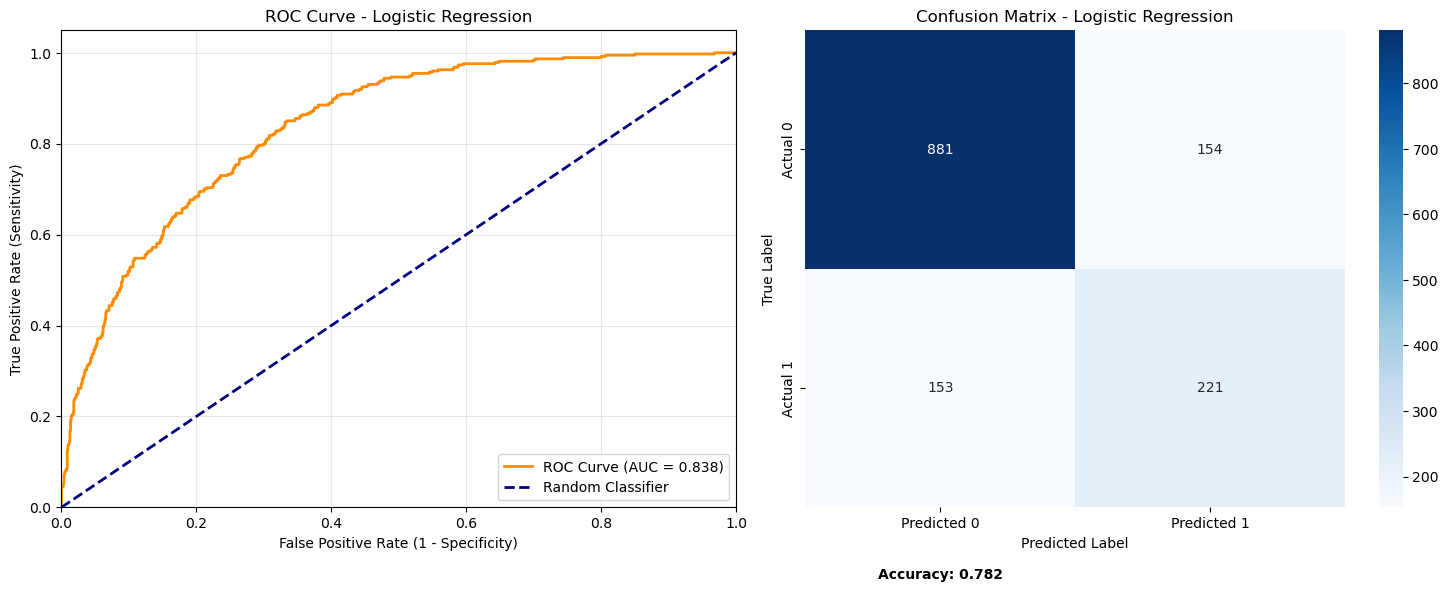


Confusion Matrix:
[[881 154]
 [153 221]]

True Negatives: 881
False Positives: 154
False Negatives: 153
True Positives: 221

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1035
           1       0.59      0.59      0.59       374

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



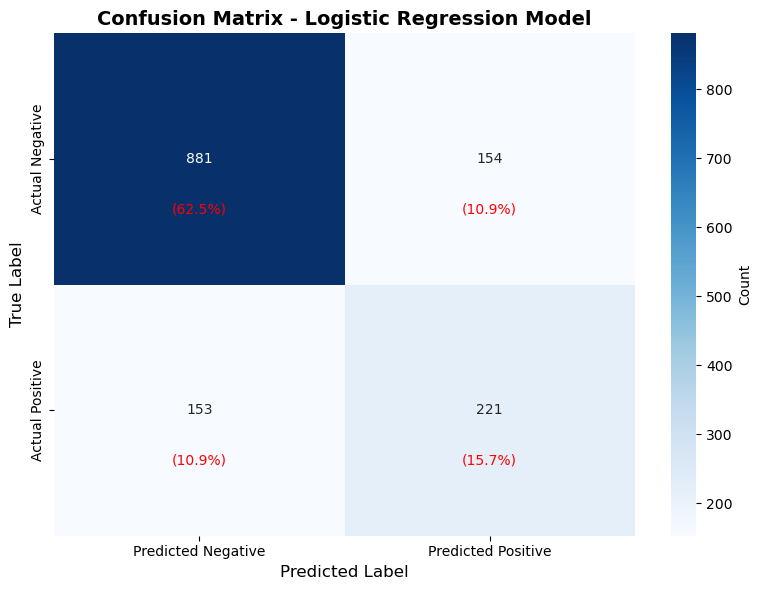


=== MODEL RANKING (F1-SCORE) ===


1. Logistic Regression: 0.611
2. Random Forest: 0.550
3. XGBoost: 0.505
4. Neural Network: 0.495
5. KNN: 0.480
6. SVM: 0.429


In [94]:
# En iyi model (Logistic Regression)
print("=== EN İYİ MODEL: LOGISTIC REGRESSION ===")
print("\n")
best_model = LogisticRegression(random_state=42, max_iter=5000)
best_model.fit(X_train_balanced, y_train_balanced)

# Test set'te final evaluation
y_test_pred = best_model.predict(X_test_numeric)
y_test_pred_proba = best_model.predict_proba(X_test_numeric)[:, 1]

print("TEST SET RESULTS:")
print("\n")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_test_pred):.3f}")
print(f"Recall: {recall_score(y_test, y_test_pred):.3f}")
print(f"F1-Score: {f1_score(y_test, y_test_pred):.3f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_test_pred_proba):.3f}")

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

# ROC AUC Curve çizimi
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
roc_auc = auc(fpr, tpr)

# Confusion Matrix hesaplama
cm = confusion_matrix(y_test, y_test_pred)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# ROC Curve çizimi
ax1.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate (1 - Specificity)')
ax1.set_ylabel('True Positive Rate (Sensitivity)')
ax1.set_title('ROC Curve - Logistic Regression')
ax1.legend(loc="lower right")
ax1.grid(True, alpha=0.3)

# Confusion Matrix görselleştirme
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax2,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
ax2.set_title('Confusion Matrix - Logistic Regression')
ax2.set_xlabel('Predicted Label')
ax2.set_ylabel('True Label')

# Confusion Matrix üzerinde metin bilgileri ekle
total = cm.sum()
accuracy = (cm[0,0] + cm[1,1]) / total
ax2.text(0.5, 2.3, f'Accuracy: {accuracy:.3f}', 
         horizontalalignment='center', fontsize=10, weight='bold')

plt.tight_layout()
plt.show()

# Confusion Matrix sayısal sonuçları
print(f"\nConfusion Matrix:")
print(cm)
print(f"\nTrue Negatives: {cm[0,0]}")
print(f"False Positives: {cm[0,1]}")
print(f"False Negatives: {cm[1,0]}")
print(f"True Positives: {cm[1,1]}")

print(f"\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Alternatif: Sadece Confusion Matrix için ayrı bir görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'],
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Logistic Regression Model', fontsize=14, weight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)

# Confusion Matrix hücrelerine yüzdelik bilgi ekle
for i in range(2):
    for j in range(2):
        percentage = cm[i, j] / cm.sum() * 100
        plt.text(j+0.5, i+0.7, f'({percentage:.1f}%)', 
                ha='center', va='center', fontsize=10, color='red')

plt.tight_layout()
plt.show()

# Model ranking by F1-Score
print("\n=== MODEL RANKING (F1-SCORE) ===")
print("\n")
ranking = results_df.sort_values('F1_Score', ascending=False)
for i, (model, score) in enumerate(zip(ranking.index, ranking['F1_Score']), 1):
    print(f"{i}. {model}: {score:.3f}")